Logistic Regression


1.Data Exploration:

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [47]:
df_train = pd.read_csv('/content/Titanic_test.csv')
df_test = pd.read_csv('/content/Titanic_train.csv')

In [48]:
df_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [49]:
df_train.shape

(418, 11)

In [50]:
df_test.shape

(891, 12)

In [51]:
# Combine train and test datasets for preprocessing
df = pd.concat([df_train, df_test], axis=0)

In [52]:
# Examine the features, their types, and summary statistics
print(df.info())
print(df.describe())
print(df.describe(include=['O'])) # Summary for categorical features

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Survived     891 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB
None
       PassengerId       Pclass          Age        SibSp        Parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean    655.000000     2.294882    29.881138     0.498854     0.385027   
std     378.020061  

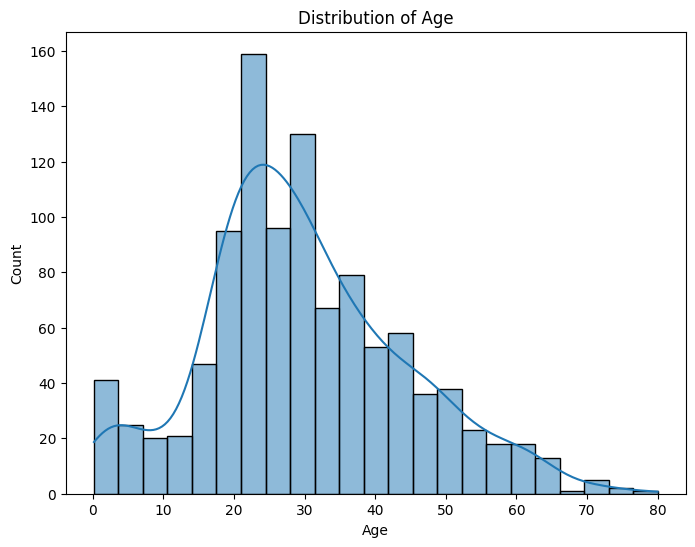

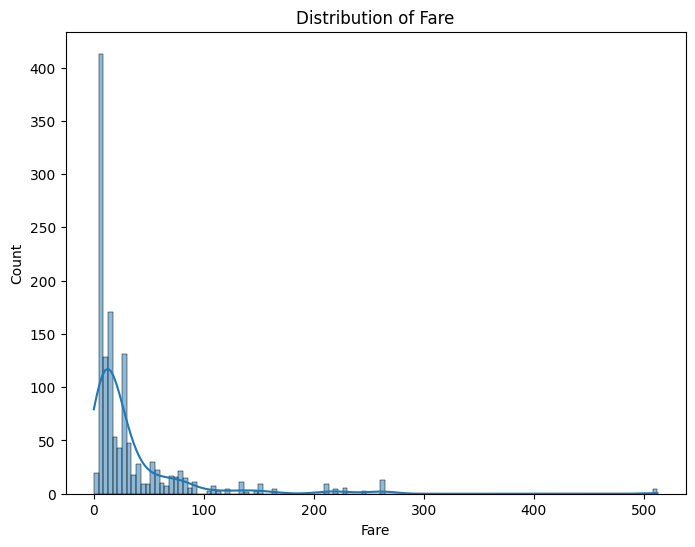

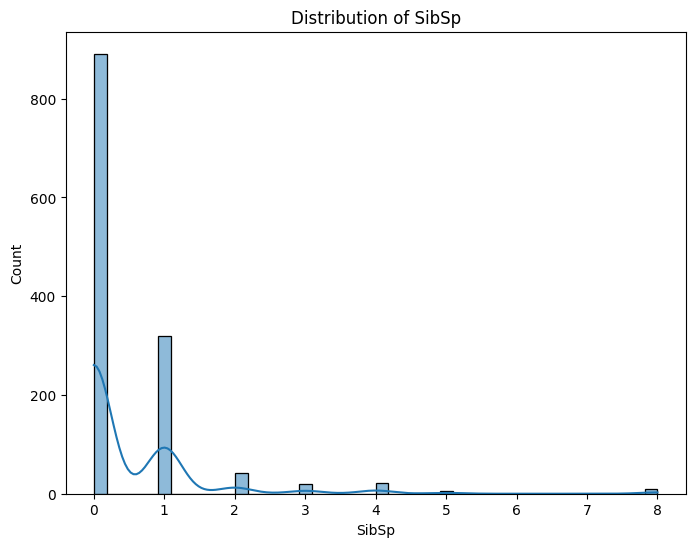

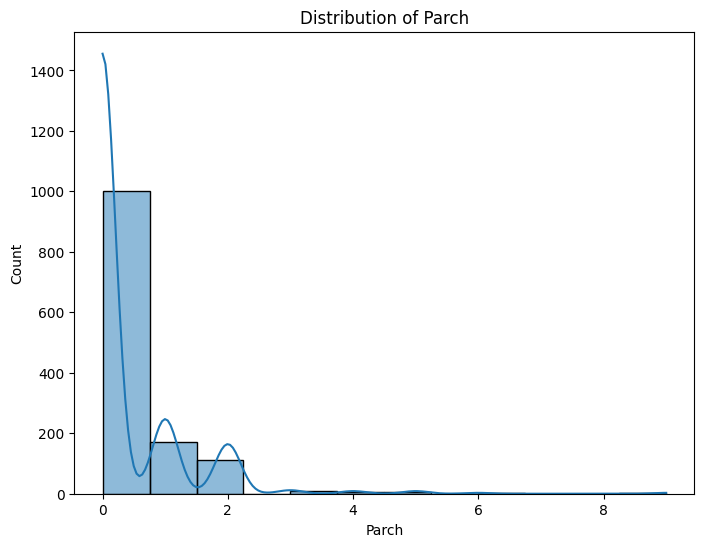

In [53]:
# Analyze numerical features
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

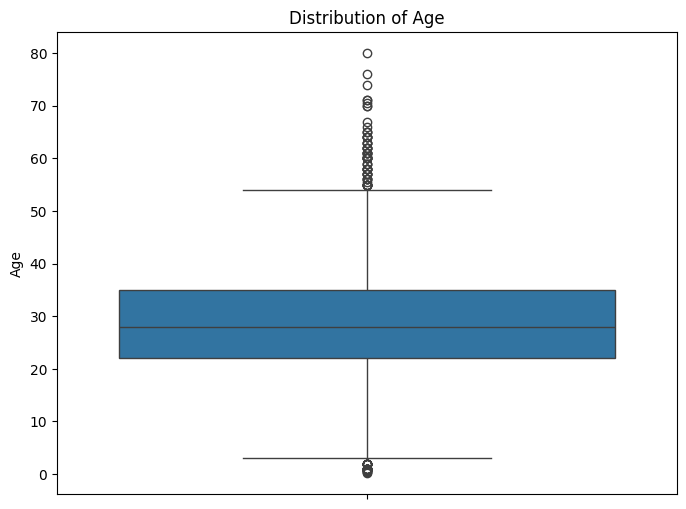

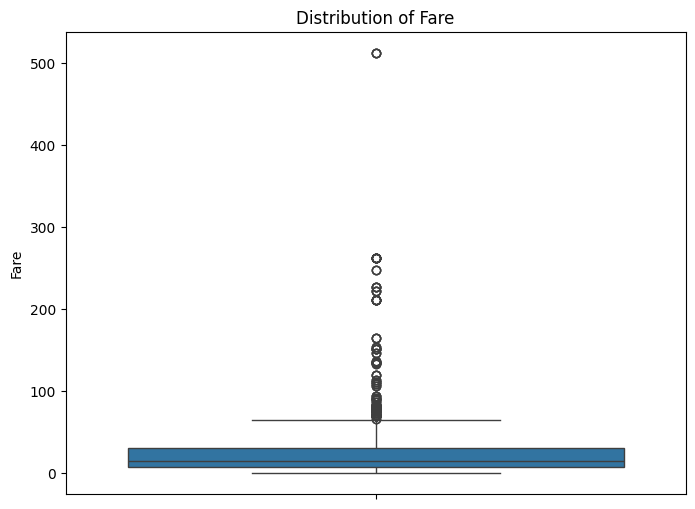

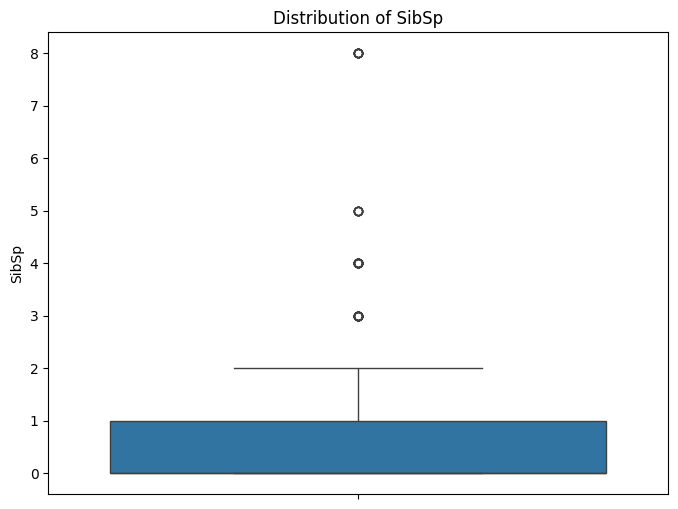

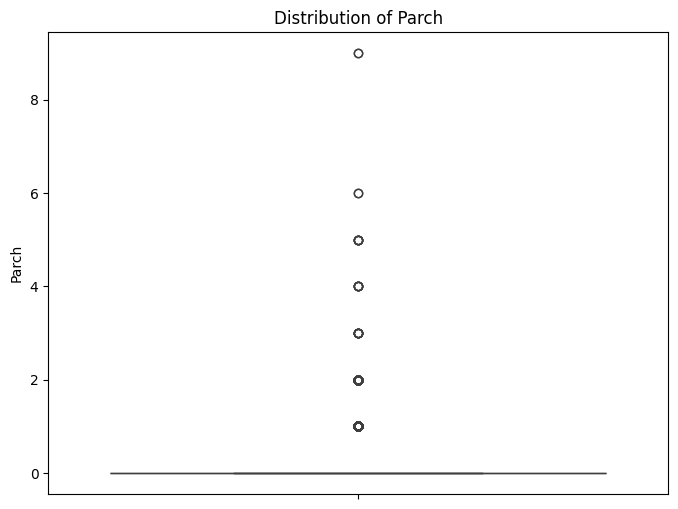

In [89]:
# Analyze numerical features
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    # Removed kde=True as it is not a valid parameter for sns.boxplot()
    sns.boxplot(df[feature])
    plt.title(f'Distribution of {feature}')
    plt.show()

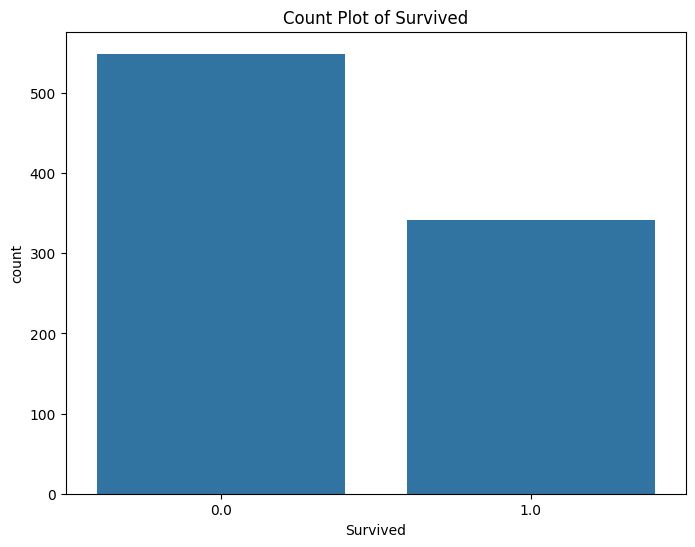

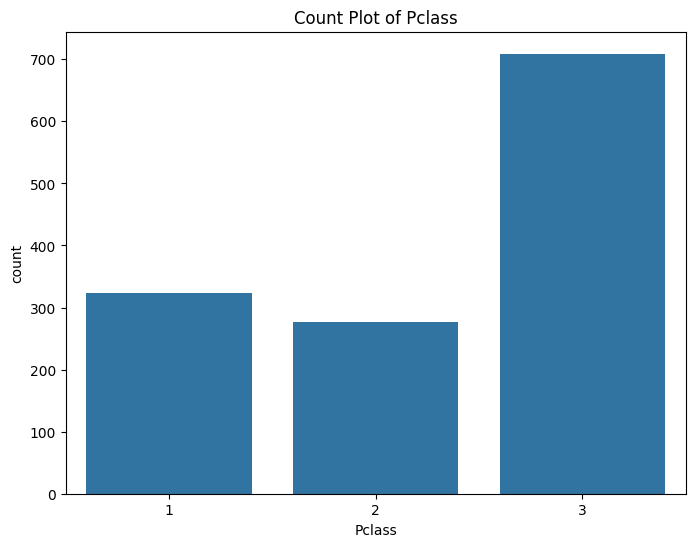

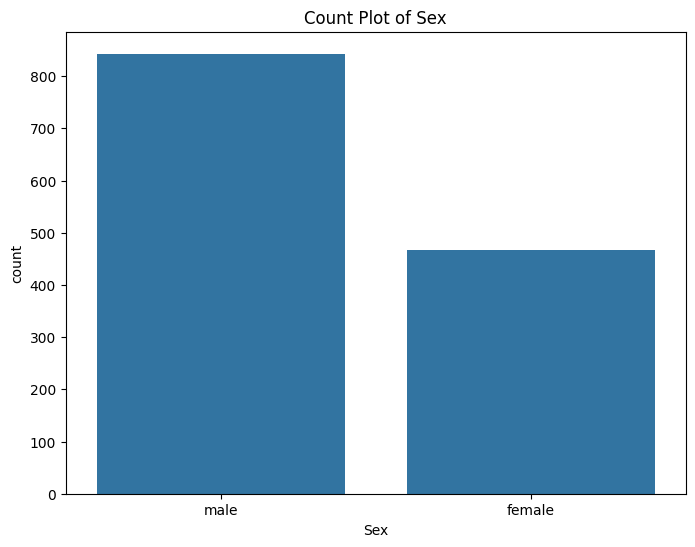

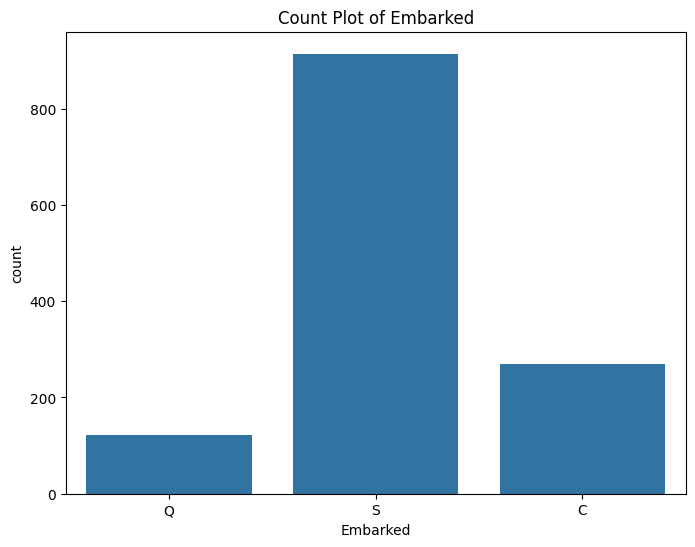

In [55]:
# Analyze categorical features
categorical_features = ['Survived', 'Pclass', 'Sex', 'Embarked']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    # Reset the index of the DataFrame before plotting
    sns.countplot(x=feature, data=df.reset_index())
    plt.title(f'Count Plot of {feature}')
    plt.show()

<Axes: xlabel='Survived', ylabel='count'>

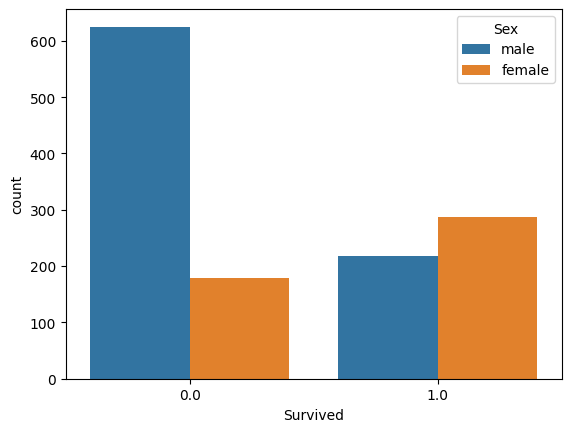

In [56]:
# Assuming 'df' contains the Titanic dataset you want to visualize
sns.countplot(x='Survived', data=df, hue='Sex')

In [57]:
#Check null values
df.isna().sum() # Replace 'newdata' with 'df', assuming 'df' is the DataFrame you want to analyze

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,1014


<Axes: >

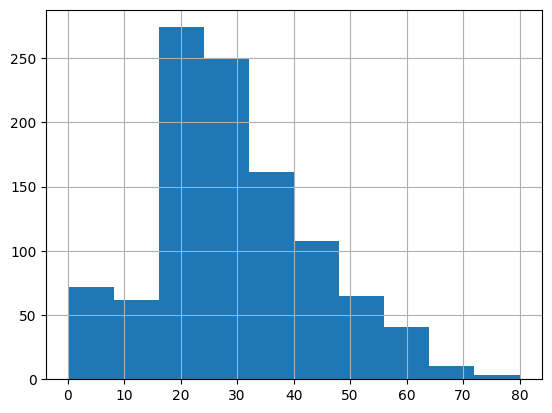

In [58]:
df["Age"].hist() # Replace 'newdata' with 'df' to use the existing DataFrame

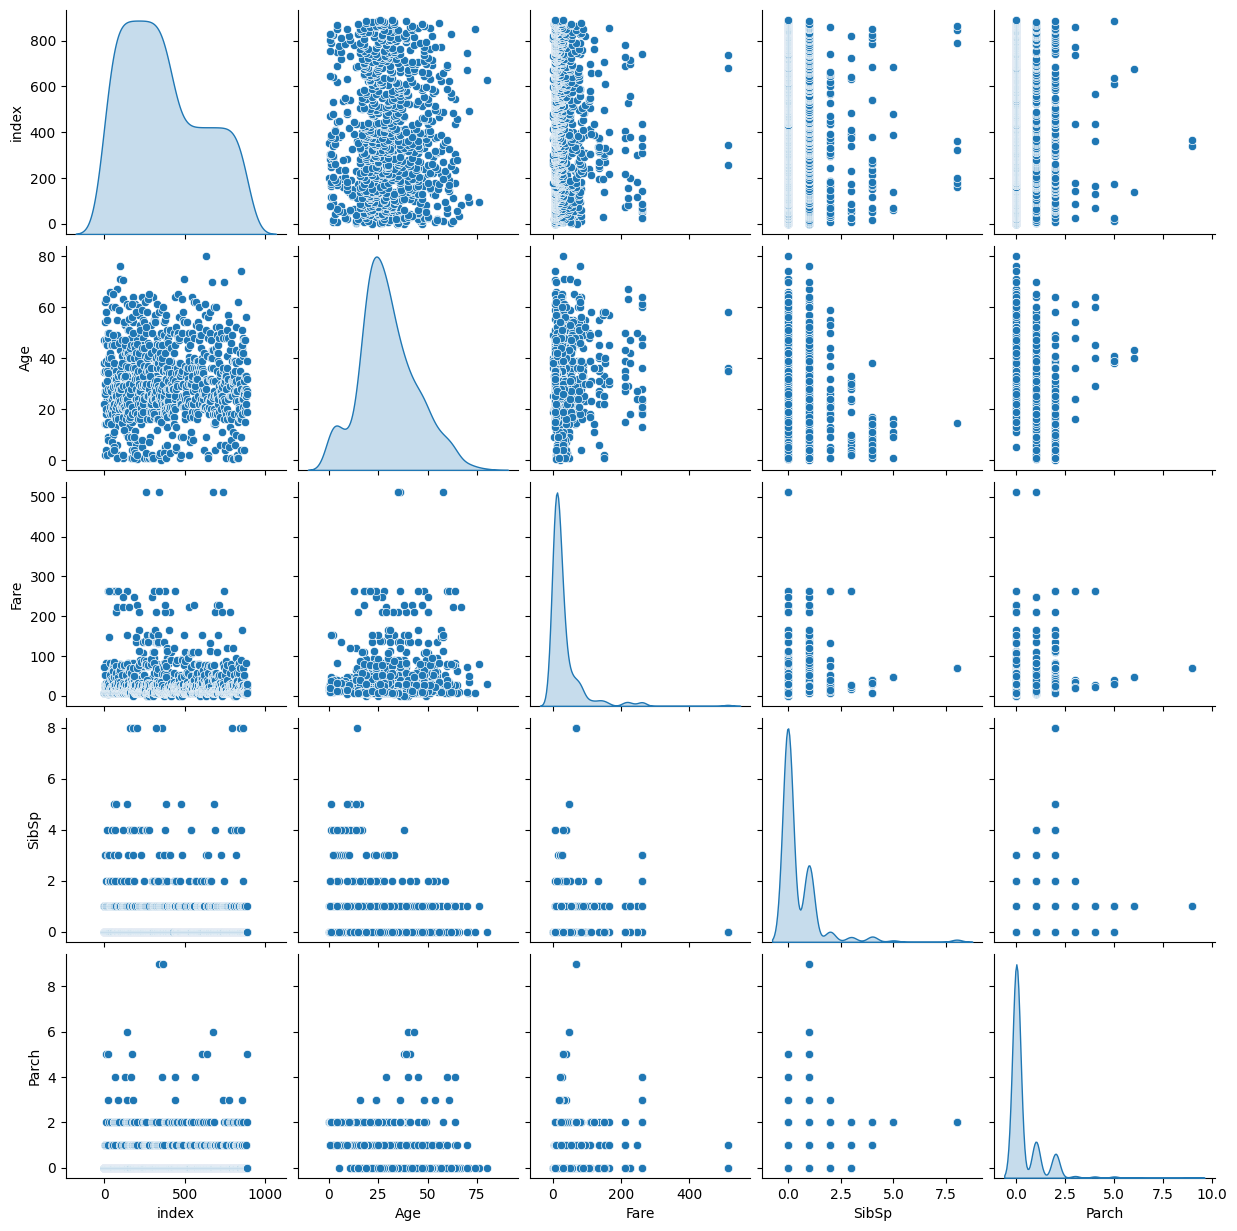

In [59]:
# Reset the index of the DataFrame to avoid duplicate labels
sns.pairplot(df[numerical_features].reset_index(), diag_kind='kde')
plt.show()

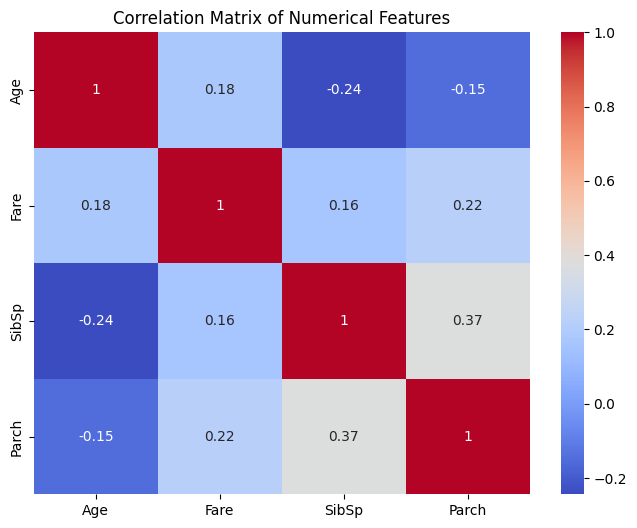

In [60]:
# Correlation matrix
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [61]:

df.isna().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,1014


2. Data Preprocessing:

In [110]:
# Assuming 'df' is the DataFrame containing your Titanic data
for col in df.select_dtypes(include=np.number): # Changed 'data' to 'df'
    df[col] = df[col].fillna(df[col].median())  # Changed 'data' to 'df'

# Fill missing categorical values with a new category (e.g., "Missing")
for col in df.select_dtypes(exclude=np.number): # Changed 'data' to 'df'
    df[col] = df[col].fillna("Missing")  #Or use the mode: df[col].fillna(df[col].mode()[0]) # Changed 'data' to 'df'


# Verify that missing values have been handled
print("\nMissing values after imputation:\n", df.isnull().sum())


Missing values after imputation:
 PassengerId         0
Pclass              0
Age                 0
SibSp               0
Parch               0
                   ..
Cabin_Missing       0
Cabin_T             0
Embarked_Missing    0
Embarked_Q          0
Embarked_S          0
Length: 2431, dtype: int64


In [63]:
# Encode categorical features using one-hot encoding
# Encode categorical features using one-hot encoding
categorical_features = df.select_dtypes(exclude=np.number).columns # Changed 'data' to 'df'
df = pd.get_dummies(df, columns=categorical_features, drop_first=True) # Changed 'data' to 'df'
print("\nData after one-hot encoding:\n", df.head()) # Changed 'data' to 'df'



Data after one-hot encoding:
    PassengerId  Pclass   Age  SibSp  Parch     Fare  Survived  \
0          892       3  34.5      0      0   7.8292       0.0   
1          893       3  47.0      1      0   7.0000       0.0   
2          894       2  62.0      0      0   9.6875       0.0   
3          895       3  27.0      0      0   8.6625       0.0   
4          896       3  22.0      1      1  12.2875       0.0   

   Name_Abbott, Master. Eugene Joseph  Name_Abbott, Mr. Rossmore Edward  \
0                               False                             False   
1                               False                             False   
2                               False                             False   
3                               False                             False   
4                               False                             False   

   Name_Abbott, Mrs. Stanton (Rosa Hunt)  ...  Cabin_F2  Cabin_F33  Cabin_F38  \
0                                  False  ... 

In [64]:
# Assuming 'df' is your preprocessed DataFrame with one-hot encoded features
# Separate features (X) and target variable (y)
# Exclude 'Name' and 'PassengerId' columns, as they are not relevant for prediction
# The following line is modified to exclude only 'Survived' and 'PassengerId'
# since 'Name', 'Ticket', and 'Cabin' might have been removed during one-hot encoding
X = df.drop(['Survived', 'PassengerId'], axis=1)  # Assuming 'Survived' is your target variable
y = df['Survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000) # Increased max_iter to ensure convergence
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

Accuracy: 0.7557251908396947
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.93      0.84       184
         1.0       0.68      0.33      0.45        78

    accuracy                           0.76       262
   macro avg       0.73      0.63      0.65       262
weighted avg       0.74      0.76      0.73       262

Confusion Matrix:
[[172  12]
 [ 52  26]]


3. Model Building:

In [65]:
# The model is already trained in the provided code.
# The following lines show the training process:

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000) # Increased max_iter to ensure convergence
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [67]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1] # Probabilities for the positive class

In [68]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

In [69]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"ROC-AUC Score: {roc_auc}")

print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

Accuracy: 0.7557251908396947
Precision: 0.6842105263157895
Recall: 0.3333333333333333
F1-score: 0.4482758620689655
ROC-AUC Score: 0.8129528985507246
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.93      0.84       184
         1.0       0.68      0.33      0.45        78

    accuracy                           0.76       262
   macro avg       0.73      0.63      0.65       262
weighted avg       0.74      0.76      0.73       262

Confusion Matrix:
[[172  12]
 [ 52  26]]


4. Model Evaluation:

In [70]:
from sklearn.metrics import roc_curve, auc

In [71]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

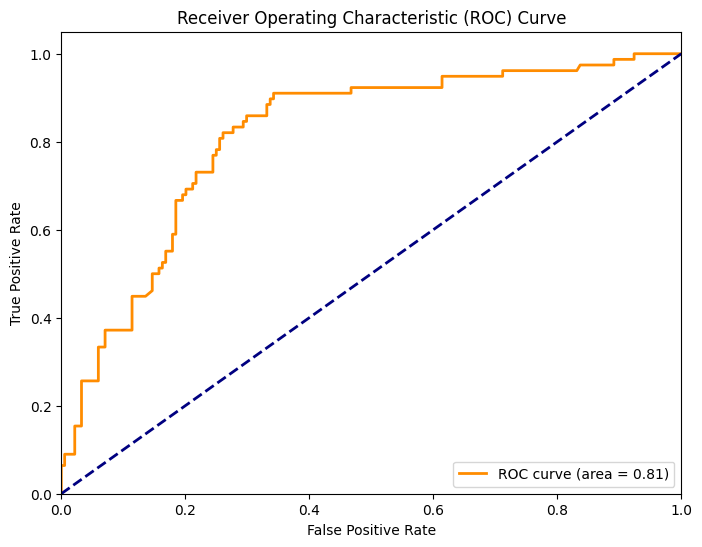

In [72]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

5. Interpretation:

In [73]:
# Get the coefficients and feature names
coefficients = model.coef_[0]
feature_names = X.columns

In [74]:
# Create a DataFrame for better visualization
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

In [75]:
# Sort by absolute coefficient value to see the most impactful features
coefficients_df = coefficients_df.reindex(coefficients_df['Coefficient'].abs().sort_values(ascending=False).index)

coefficients_df

,Feature,Coefficient
1311,Sex_male,-1.841485
1415,Ticket_1601,1.631681
1632,Ticket_29106,1.188797
2080,Ticket_C.A. 37671,1.179712
1788,Ticket_347742,1.124899
...,...,...
1171,"Name_Taussig, Mrs. Emil (Tillie Mandelbaum)",0.000000
234,"Name_Chibnall, Mrs. (Edith Martha Bowerman)",0.000000
533,"Name_Herman, Miss. Alice",0.000000
1175,"Name_Thayer, Mr. John Borland",0.000000


In [111]:
# Get the coefficients and feature names
coefficients = model.coef_[0]
feature_names = X.columns

# Create a DataFrame for better visualization
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort by absolute coefficient value to see the most impactful features
coefficients_df = coefficients_df.reindex(coefficients_df['Coefficient'].abs().sort_values(ascending=False).index)

print(coefficients_df)

                                          Feature  Coefficient
1311                                     Sex_male    -1.841485
1415                                  Ticket_1601     1.631681
1632                                 Ticket_29106     1.188797
2080                            Ticket_C.A. 37671     1.179712
1788                                Ticket_347742     1.124899
...                                           ...          ...
1171  Name_Taussig, Mrs. Emil (Tillie Mandelbaum)     0.000000
234   Name_Chibnall, Mrs. (Edith Martha Bowerman)     0.000000
533                      Name_Herman, Miss. Alice     0.000000
1175                Name_Thayer, Mr. John Borland     0.000000
1130                      Name_Spector, Mr. Woolf     0.000000

[2429 rows x 2 columns]


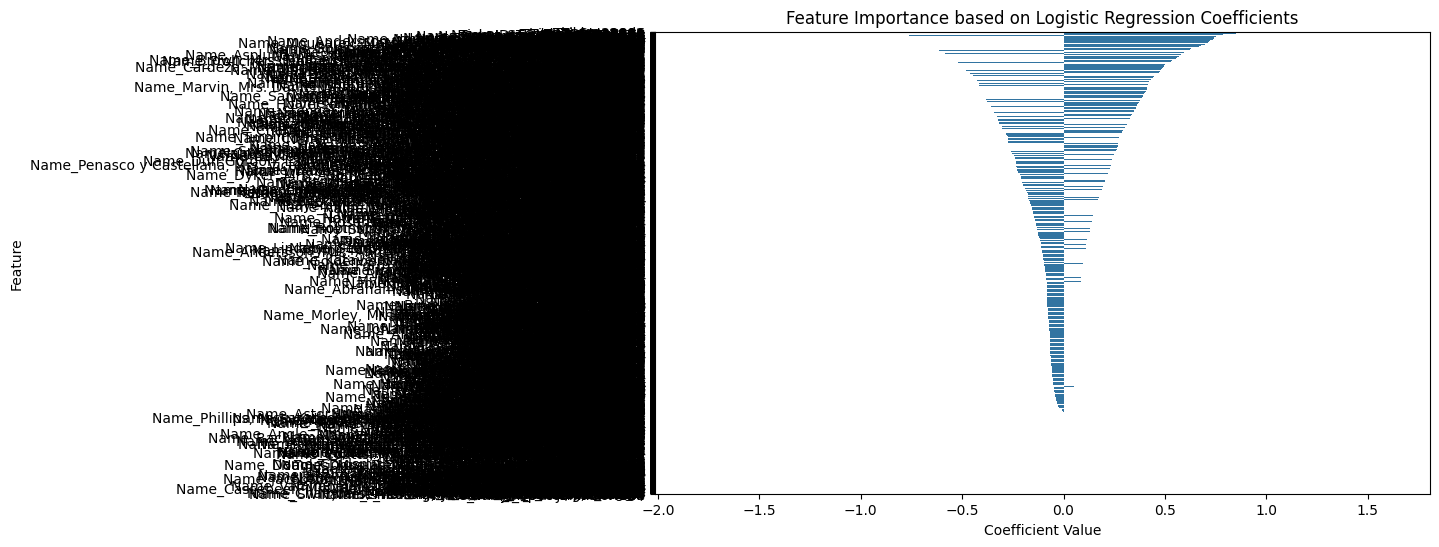

In [112]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_df)
plt.title('Feature Importance based on Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

6. Deployment with Streamlit:

In [94]:
!pip install streamlit

In [95]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression


In [96]:
# Create the Streamlit app
st.title("Titanic Survival Prediction")

2024-12-17 18:29:01.334 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-17 18:29:01.337 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [97]:
# User inputs
st.sidebar.header("Passenger Information")

2024-12-17 18:29:30.556 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-17 18:29:30.559 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator(_root_container=1, _parent=DeltaGenerator())

In [98]:
pclass = st.sidebar.selectbox("Pclass", [1, 2, 3])
sex = st.sidebar.selectbox("Sex", ["male", "female"])
age = st.sidebar.slider("Age", 0, 100, 25)
sibsp = st.sidebar.slider("SibSp", 0, 8, 0)
parch = st.sidebar.slider("Parch", 0, 6, 0)
fare = st.sidebar.slider("Fare", 0.0, 600.0, 30.0)
embarked_c = st.sidebar.selectbox("Embarked (C)", [0,1])
embarked_q = st.sidebar.selectbox("Embarked (Q)", [0,1])
embarked_s = st.sidebar.selectbox("Embarked (S)", [0,1])

2024-12-17 18:29:53.583 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-17 18:29:53.587 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-17 18:29:53.589 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-17 18:29:53.591 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-17 18:29:53.593 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-17 18:29:53.595 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-17 18:29:53.597 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-17 18:29:53.598 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [109]:
# Example input features (replace with your actual feature names)
# Ensure these names exactly match the features used during model training.
pclass = st.sidebar.selectbox("Pclass", [1, 2, 3])
sex = st.sidebar.selectbox("Sex", ["male", "female"])

2024-12-17 18:34:17.826 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-17 18:34:17.835 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-17 18:34:17.836 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-17 18:34:17.838 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-17 18:34:17.843 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-17 18:34:17.846 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-17 18:34:17.856 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-17 18:34:17.865 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

Interview Questions:

1.What is the difference between precision and recall?

1. Precision: Precision measures the proportion of correctly predicted positive instances out of all instances that were predicted as positive

  Formula:    Precision= True Positives (TP)/True Positives (TP)+False Positive (FP)
                                      
2. Recall
Definition: Recall measures the proportion of correctly predicted positive instances out of all actual positive instances.


Formula:

 Recall=   True Positives (TP)/True Positives (TP)+False Negatives (FN)

Relationship Between Precision and Recall


There is often a trade-off between precision and recall. Improving one can lead to a decline in the other. This trade-off is typically visualized using a Precision-Recall Curve or balanced using metrics like the F1 Score, which is the harmonic mean of precision and recall:

           F1 Score=2⋅ Precision+Recall/Precision⋅Recall





2.What is cross-validation, and why is it important in binary classification?

     
 cross-validation:

     Cross-validation is a statistical technique used to evaluate the performance of a machine learning model by splitting the dataset into multiple subsets (or folds) to test and train the model on different portions of the data. This process helps assess how well the model generalizes to unseen data


  important in binary classification
        
 1. Mitigates Overfitting:

It helps ensure that the model isn't just memorizing the training data, but is learning patterns that generalize to unseen data.
Testing on different subsets reduces the risk of overestimating the model's performance.
  
2.Reliable Performance Estimates:

By averaging performance metrics across multiple folds, cross-validation provides a more robust and less biased estimate of how the model will perform on new data.


3.Works with Limited Data:

For binary classification problems, datasets are often small, and splitting the data into separate train and test sets may lead to inefficient use of data. Cross-validation maximizes data usage by reusing samples across folds.
Addresses Imbalanced Datasets:

In binary classification, one class (e.g., "positive") might be underrepresented. Techniques like stratified cross-validation ensure that each fold maintains the class distribution, leading to fairer evaluation.

4.Model Selection and Tuning:

Cross-validation can guide the selection of hyperparameters (e.g., learning rate, regularization strength) by testing different configurations and evaluating their performance consistently across folds.

5.Comparison of Models:

It allows for a fair comparison between different models by ensuring that they are evaluated on the same folds.

Example in Binary Classification:

Scenario: You’re building a binary classifier to predict whether an email is spam (positive) or not spam (negative).

Without Cross-Validation: The model might perform well on a specific test set but fail on new data due to overfitting.
With Cross-Validation: Using
k
k-fold cross-validation, the model is tested on multiple subsets, and you get a more reliable estimate of how well it will classify unseen emails, even if the spam vs. non-spam ratio is imbalanced.
Cross-validation thus plays a crucial role in ensuring robust and fair evaluation of binary classification models.




















